<h1 align="center">Búsqueda de la ruta más optima para personas en condición de silla de ruedas por medio de grafos</h1>
</br>

A continuación se trabaja la solución al problema de encontrar la ruta más optima para personas en condición de silla de ruedas para recorrer la universidad. Primero se hace un tratamiento de los datos para representarlos como grafos de dificultad y distancia de los caminos que conectan diferentes puntos de la universidad. Para esto se utiliza la librería <b><i>networkx</i></b> para crear y dibujar el grafo, y la librería <b><i>matplotlib</i></b> para crear el espacio donde se va a graficar.
Luego, se aplica el algoritmo Dijkstra para encontrar los caminos más cortos y se vuelven a dibujar los grafos con los caminos encontrados.


<p >En la imagen un mapa de la universidad y el grafo de las rutas que trata esta implementación</p>
<img  src="assets/grafo-uis.png" style="width:300px;height:200px;">

<h3>Cargar los datos</h3>
<br>    
Los lugares son un diccionario que asocia una sigla y el nombre completo del lugar, para respresentar el grafo se usara la sigla. Para las aristas (<i>edges</i>) entre los nodos se emplea una lista que contiene la arista y el peso asociado

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import json

# Archivos con informacion de nodos y aristas
f = open('assets/nodes.json')
lugares = json.load(f)
f = open('assets/aristas.json')
aristas = json.load(f)

#Imprimir informacion de nodos y aristas
print("{:<15} {:<30} {:<15}".format("\t", "NODOS", ""))
print("{:<10} {:<20} {:<15} {:<15}".format('Sigla', 'Nombre', 'X', 'Y'))
for k, v in lugares.items():
    print("{:<10} {:<20} {:<15} {:<15}".format(k, v["nombre"], v["posicion"][0], v["posicion"][1]))
    
print("\n")
print("{:<3} {:<20} {:<10}".format("\t", "ARISTAS", ""))
print("{:<8} {:<12} {:<10}".format('Nodos', 'Dificultad', 'Distancia (m)'))
for k, v in aristas.items():
    print("{:<12} {:<12} {:<10}".format(k, v["dificultad"], v["distancia"]))

	               NODOS                                         
Sigla      Nombre               X               Y              
E          Entrada              423.89138       92.81478       
LC         LuisACalvo           456.62827       173.56299      
H          Humanas              308.47801       93.65721       
BB         Biblioteca           341.33291       328.6961       
C          Centic               265.43733       300.05337      
Q          Quimica              189.61833       292.39489      
JB         JUan Bautista        103.8433        265.59019      
LP         Lb Pesados           102.31161       333.7507       
LL         Lb Livianos          243.61065       192.22191      
CT         Camilo Torres        278.15041       246.13764      
M          Mecanica             365.76348       192.22191      
I          Idiomas              364.23178       388.12595      
D          Diseno               285.34939       389.65764      
L          Lago                 400      

<h3>Creación de los grafos</h3>
Para poder mostrar los grafos con la librería networkxs se creara un array para las aristas de dificultad y otro para las aristas de distancia. Estos arrays consisten de tuplas con los nodos que se conectan y el peso.

In [4]:
edgesDificultad = []
for arista in aristas.keys():
    nodos = arista.split()
    edgesDificultad.append((nodos[0], nodos[1], aristas[arista]["dificultad"]))
    
edgesDistancia = []
for arista in aristas.keys():
    nodos = arista.split()
    edgesDistancia.append((nodos[0], nodos[1], aristas[arista]["distancia"]))

nodes = lugares.keys()

# Grafo como una lista de adyacencia (usando diccionarios)
grafoDificultad = {}
grafoDistancia = {}
for node in nodes:
    aristasDif = []
    for edge in edgesDificultad:
        if node in edge:
            arista = list(edge)
            arista.remove(node)
            aristasDif.append(tuple(arista))
    grafoDificultad[node] = aristasDif
    
    aristasDis = []
    for edge in edgesDistancia:
        if node in edge:
            arista = list(edge)
            arista.remove(node)
            aristasDis.append(tuple(arista))
    grafoDistancia[node] = aristasDis
    

print("Grafo dificultad del camino:")
for key, value in grafoDificultad.items():
    print(key, value)
    
print("\nGrafo distancia del camino:")
for key, value in grafoDistancia.items():
    print(key, value)


# Grafo de dificultad del camino
G = nx.Graph()
for nodo in nodes:
    G.add_node(nodo, pos = lugares[nodo]["posicion"])
    
G.add_weighted_edges_from(edgesDificultad)
pos=nx.get_node_attributes(G,'pos')

# Grafo de distancias
D = nx.Graph()
for nodo in nodes:
    D.add_node(nodo, pos = lugares[nodo]["posicion"])
D.add_weighted_edges_from(edgesDistancia)


Grafo dificultad del camino:
E [('LC', 1), ('H', 6)]
LC [('E', 1), ('L', 2), ('M', 10)]
H [('E', 6), ('LL', 3)]
BB [('C', 1), ('I', 10), ('CT', 2), ('L', 5)]
C [('BB', 1), ('Q', 1)]
Q [('C', 1), ('JB', 1)]
JB [('Q', 1), ('LP', 1)]
LP [('JB', 1), ('D', 1)]
LL [('H', 3), ('CT', 1), ('M', 3)]
CT [('LL', 1), ('M', 2), ('BB', 2)]
M [('LL', 3), ('CT', 2), ('LC', 10)]
I [('BB', 10), ('D', 3), ('G', 9), ('L', 10), ('BI', 7)]
D [('I', 3), ('LP', 1)]
L [('LC', 2), ('G', 2), ('I', 10), ('BB', 5)]
G [('I', 9), ('L', 2), ('BI', 6)]
BI [('G', 6), ('I', 7)]

Grafo distancia del camino:
E [('LC', 120), ('H', 130)]
LC [('E', 120), ('L', 150), ('M', 92)]
H [('E', 130), ('LL', 100)]
BB [('C', 30), ('I', 55), ('CT', 35), ('L', 60)]
C [('BB', 30), ('Q', 70)]
Q [('C', 70), ('JB', 60)]
JB [('Q', 60), ('LP', 72)]
LP [('JB', 72), ('D', 180)]
LL [('H', 100), ('CT', 65), ('M', 75)]
CT [('LL', 65), ('M', 65), ('BB', 35)]
M [('LL', 75), ('CT', 65), ('LC', 92)]
I [('BB', 55), ('D', 38), ('G', 90), ('L', 30), ('BI',

<h3>Dibujar los grafos</h3>

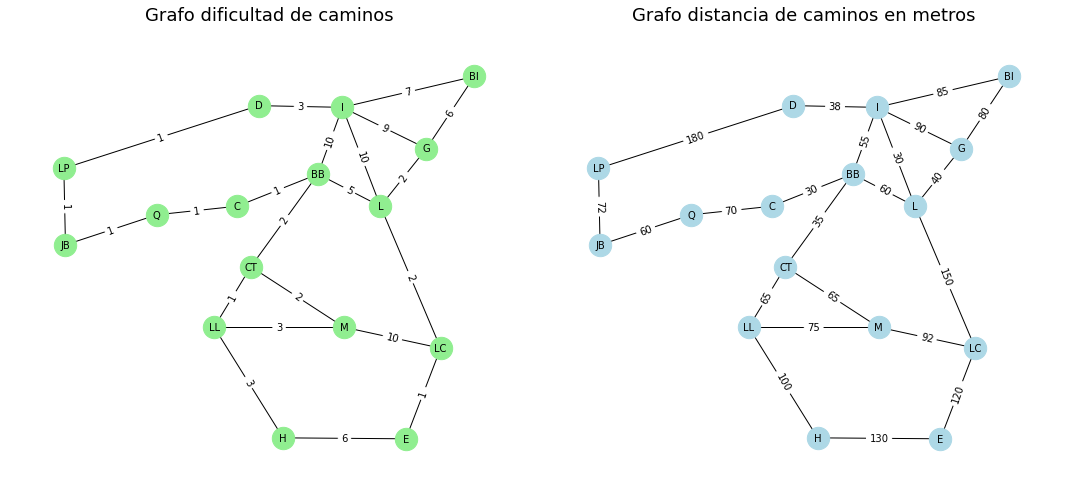

In [5]:
# Metodo para dibujar grafos
# A : grafo de networkx, titulo : titulo del grafo, labelsName = nombre del atributo de A de los labels que se van a mostrar
# nodecolor : color de los nodos, saveimg : True si desea guardar la imagen, filename = nombre del archivo donde se guardaria
# edgescolored : True si las aristas tienen un color especial,  edgeswith: grosor de las aristas
# positions: lista con las posiciones de los nodos
def dibujarGrafo(A, titulo = "Grafo", labelsName = "weight",
                nodecolor = 'lightgreen', saveimg = False, filename = "",
                edgescolored = False, edgeswidth = 1, positions = pos):
    ax = plt.gca() # los ejes
    ax.margins(0.08)
    plt.axis("off") # Oculta los ejes
    
    plt.title(titulo, fontsize=18)
    

    labels = nx.get_edge_attributes(A,labelsName)
     #Nodos
    nx.draw_networkx_nodes(A, positions, node_size=500, node_color=nodecolor)
    nx.draw_networkx_labels(A, positions, font_size=10, font_family="sans-serif")
    
    # Edges
    # Colores a cada arista
    if edgescolored:
        colors = nx.get_edge_attributes(A,'color').values()
        nx.draw_networkx_edges(A, positions, edge_color=colors,  width=edgeswidth, min_source_margin=1)
    else:
        nx.draw_networkx_edges(A, positions,  width=edgeswidth, min_source_margin=1)
        
    nx.draw_networkx_edge_labels(A, positions, labels)
    
    if saveimg:
        plt.savefig('assets/'+filename)


# Dibujar grafo dificultad
plt.subplots(nrows=1, ncols=2, figsize=(15, 7)) # Crea una figura con dos columnas
plt.subplot(121) # Añadir un plot a la figura
dibujarGrafo(G, 'Grafo dificultad de caminos', filename = 'GrafodificultadCamino.png')

# Dibujar grafo distancias
plt.subplot(122)
dibujarGrafo(D, 'Grafo distancia de caminos en metros', nodecolor='lightblue', filename='GrafodistanciaCamino.png' )

plt.tight_layout()
plt.show()

<h1>Solución al problema</h1>

Se utilizará el algoritmo Dijkstra implementado con una <b>lista de adyacencia</b> y colas de prioridad con la estructura <b><i>Heap</i></b> para obtener una complejidad temporal de <b>O( (E+V) * log V)</b>.
Para esto se necesita la información del grafo como un diccionario con cada vertice como un key que apunta a una lista de sus aristas adyacentes y sus pesos. Los grafos en forma de diccionarios se obtuvieron en bloques previos y estan almacenados en las variables grafoDificultad y grafoDistancia

<h2>Implementación de Dijkstra con listas enlazadas</h2>

In [6]:
# heapq tiene implementados los algoritmos de min_heap necesarios para el funcionamiento de Dijkstra
from heapq import *

## Encontrar el camino mas corto de un vertice a todos los demás vertices del grafo
## graph: lista de adyacencia del grafo en forma de diccionario 
## start: vertice inicial
def dijkstra(graph, start):
    distances = {}
    # Inicializamos la distancia desde el nodo inicial a cualquier nodo en infinito
    # diccionario con los predecesores de cada vertice
    predecesores = {}
    for vertex in graph.keys():
        distances[vertex] = float('infinity')
        predecesores[vertex] = ''
    
    # La distancia al nodo inicial es 0
    distances[start] = 0
    
    # Introducimos el vertice inicial en el heap
    h = [(0, start)]
    n = len(graph.keys())
    visited = {}
    for v in distances.keys():
        visited[v] = False
        
    while len(h) > 0:
        # extraemos el vertice con la menor distancia
        l,u = heappop(h)
         # si ya lo visitamos lo saltamos
        if visited[u]:
            continue
            
        visited[u] = True
        for v, d in graph[u]:
            # si la distancia del nodo nodo que estoy visitando + la distancia al vecino
            # es menor que la distancia que tenia antes del vecino. Actualizo la distancia del vecino
            # a la mas corta. Y lo meto al heap
            if distances[u] + d < distances[v]:
                distances[v] = distances[u] + d
                heappush(h, (distances[v], v))
                predecesores[v] = u

    return distances, predecesores

<h2>Funcionamiento de la función dijkstra</h2>
Para mostrar el funcionamiento del algoritmo de dijkstra encontraremos los caminos más cortos de la entrada de la uis a cualquiera de los vertices del mapa. El peso total del camino más corto a cada arista es retornado por la variable <b>distances</b>. 
Para obtener el camino más corto del vertice de inicio hasta un vertice en específico actualizamos el "padre" o predecesor del vertice en la búsqueda del camino más corto hacia este. De esta forma se obtiene un diccionario con los padres de cada nodo, que es retornada por la variable <b>predecesores</b>. La función <i>shortesPath</i> sigue esta lista para encontrar el camino más corto de un nodo de salida a un nodo target

In [7]:
inicio = 'E'
distancias, predecesores = dijkstra(grafoDistancia, inicio)
print("Lista de distancias más cortas a los demás vertices desde la entrada")
print(distancias)

print("\nLista de padres de cada vertice siguiendo el camino más corto")
print(predecesores)

# Dibujar el grafo de resultado dijkstra
# Grafo de distancias
K = nx.Graph()
for nodo in nodes:
    K.add_node(nodo, pos = lugares[nodo]["posicion"])
    
for vertice, peso in distancias.items():
    if vertice != inicio:
        K.add_edge(inicio, vertice, weight=peso)


#plt.subplots(nrows=1, ncols=1, figsize=(15, 8)) # Crea una figura con dos columnas
#plt.subplot(121) # Añadir un plot a la figura
#dibujarGrafo(K, "Resultado de Dijkstra", filename="dijkstraGrafo.png", positions = pos)
#plt.tight_layout()
#plt.show()

Lista de distancias más cortas a los demás vertices desde la entrada
{'E': 0, 'LC': 120, 'H': 130, 'BB': 312, 'C': 342, 'Q': 412, 'JB': 472, 'LP': 518, 'LL': 230, 'CT': 277, 'M': 212, 'I': 300, 'D': 338, 'L': 270, 'G': 310, 'BI': 385}

Lista de padres de cada vertice siguiendo el camino más corto
{'E': '', 'LC': 'E', 'H': 'E', 'BB': 'CT', 'C': 'BB', 'Q': 'C', 'JB': 'Q', 'LP': 'D', 'LL': 'H', 'CT': 'M', 'M': 'LC', 'I': 'L', 'D': 'I', 'L': 'LC', 'G': 'L', 'BI': 'I'}


<h2>Encontrar el camino más corto desde un vertice inicial hasta un vertice específico</h2>
Por medio del diccionario de predecesores retornado por la función dijkstra

In [8]:
def shortestPath(graph, start, target):
    r, predecesores = dijkstra(graph, start)
    camino = [target]
    i = target
    while i != start:
        camino.append(predecesores[i])
        i = predecesores[i]
        
    return list(reversed(camino))


start = 'I'
target = 'H'
caminoRapido = shortestPath(grafoDistancia, start, target)
print("Camino menor distancia:")
print(caminoRapido)

caminoFacil = shortestPath(grafoDificultad, start, target)
print("Camino menor dificultad:")
print(caminoFacil)

Camino menor distancia:
['I', 'BB', 'CT', 'LL', 'H']
Camino menor dificultad:
['I', 'D', 'LP', 'JB', 'Q', 'C', 'BB', 'CT', 'LL', 'H']


<h3>Camino sugerido</h3>

In [21]:
#Calcluar:
#Encuentra el peso total de un camino
#     Si necesitamos el total de la dificultad, damos como párametro grafoDificultad
#     Si necesitamos el total de la distancia, damos como párametro grafoDistancia

def pesoTotal(camino, diccionario):
    suma = 0
    for i in range((len(camino)-1)):
        a = diccionario.get(camino[i])
        for j in a:
            nodo,valor = j
            if nodo == camino[i+1]:
                suma += valor
    return suma


#Recibe dos parametros, el primero es el camino con menor dificultad y el segundo parametro es el camino mas corto
def caminoSugerido(camino1, camino2):
    
    #Informacion del camino 1 o camino menos dificil
    promedioDificultad_1 = pesoTotal(camino1,grafoDificultad)/(len(camino1)-1)
    distanciaTotal_1 = pesoTotal(camino1,grafoDistancia)
    caminoMenosDificil = (promedioDificultad_1,distanciaTotal_1) #Tupla que contiene los dos atributos
    
    #Informacion del camino 2 o con menor distancia
    promedioDificultad_2 = pesoTotal(camino2,grafoDificultad)/(len(camino2)-1)
    distanciaTotal_2 = pesoTotal(camino2,grafoDistancia)
    caminoMasCorto = (promedioDificultad_2,distanciaTotal_2) #Tupla que contiene los dos atributos
    
    return caminoMenosDificil, caminoMasCorto

#Transforma la dificultad promedio a una escala de facil, medio y dificil
def transformacionDificultad(numero):
    stringzaso = ""
    if numero < 3.3:
        stringzaso = "fácil"
    elif numero < 6.6:
        stringzaso = "media"
    else:
        stringzaso = "difícil"
    return stringzaso


caminoFacilProp , caminoRapidoProp = caminoSugerido(caminoFacil,caminoRapido)
def caminoToString(camino, prop):
    return str(camino) +".\nTiene una distancia de "+str(prop[1])+"m y una dificultad "+ transformacionDificultad(prop[0])

print("El camino con menos obstaculos es:\t" + caminoToString(caminoFacil, caminoFacilProp))
print('-' * 100) 
print("El camino mas rápido es:\t"+ caminoToString(caminoRapido, caminoRapidoProp))

El camino con menos obstaculos es:	['I', 'D', 'LP', 'JB', 'Q', 'C', 'BB', 'CT', 'LL', 'H'].
Tiene una distancia de 650m y una dificultad fácil
----------------------------------------------------------------------------------------------------
El camino mas rápido es:	['I', 'BB', 'CT', 'LL', 'H'].
Tiene una distancia de 255m y una dificultad media


<h3>Dibujar los grafos con los caminos más cortos</h3>

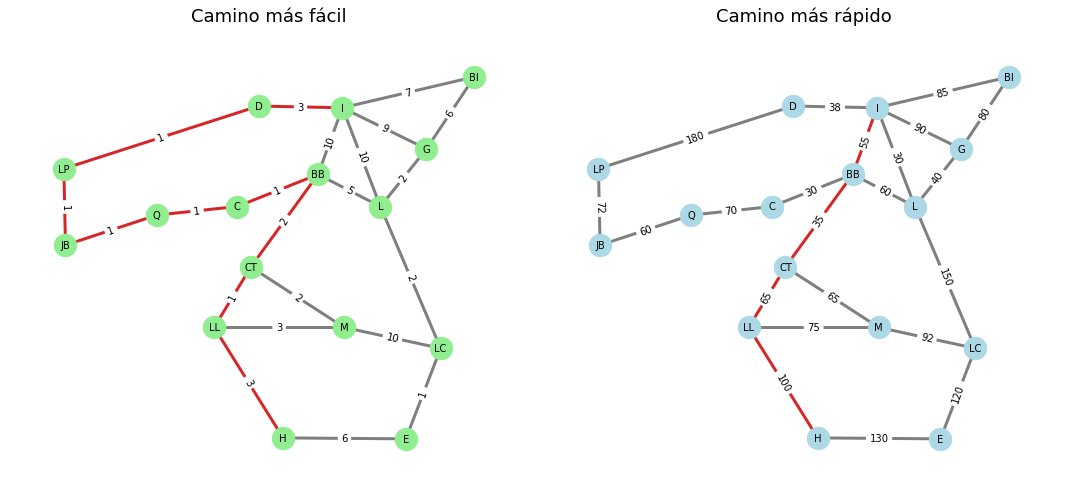

In [17]:
# Mostrar grafo resultados
def getGrafoConCamino(camino): 
    R = nx.Graph()
    for nodo in nodes:
        R.add_node(nodo, pos = lugares[nodo]["posicion"])

    for vertices, pesos in aristas.items():
        v1, v2 = vertices.split()
        
        if (v1 in camino and v2 in camino) and (camino.index(v1) == camino.index(v2) + 1 or camino.index(v2) == camino.index(v1) + 1):
            c = 'tab:red'
        else: c = 'tab:gray'
            
        R.add_edge(v1,v2,color=c, dificultad=pesos["dificultad"], distancia=pesos["distancia"] )
        
    return R

plt.subplots(nrows=1, ncols=2, figsize=(15, 7)) # Crea una figura con dos columnas
plt.subplot(121) 
GFacil = getGrafoConCamino(caminoFacil)
dibujarGrafo(GFacil, 'Camino más fácil', filename = 'caminoFacil.png',
             edgescolored = True, labelsName='dificultad', edgeswidth = 3)

plt.subplot(122) 
GRapido = getGrafoConCamino(caminoRapido)
dibujarGrafo(GRapido, 'Camino más rápido', filename = 'caminoRapido.png',
             edgescolored = True, labelsName='distancia', edgeswidth = 3, nodecolor= "lightblue")
plt.tight_layout()
plt.show()